In [18]:
import sys
import os
import glob

package_path = "../../funROI"
sys.path.append(os.path.abspath(package_path))
import funROI

funROI.set_bids_data_folder("../data/bids")
funROI.set_bids_deriv_folder("../data/bids/derivatives/funROI")
funROI.set_bids_preprocessed_folder("../data/bids/derivatives/fmriprep")

# Turn off all warnings
import warnings

warnings.filterwarnings("ignore")

fill_na_with_zero = False

# fROI Definition

In [19]:
from funROI.froi import FROI, get_frois
from funROI.localizer import Localizer

In [20]:
subjects = [
    "040",
    "057",
    "059",
    "056",
    "067",
    "068",
    "019",
    "070",
    "087",
    "078",
    "089",
    "076",
]
frois = [
    (
        "SWNloc",
        [
            FROI(
                localizer="S-N",
                thresholdType="percent",
                thresholdValue=0.1,
                parcels="Language",
            ),
        ],
    ),
    (
        "EventsOrig",
        [
            FROI(
                localizer="Sem_photominusPerc_photo",
                thresholdType="percent",
                thresholdValue=0.1,
                parcels="Events",
            ),
            FROI(
                localizer="Sem_sentminusPerc_sent",
                thresholdType="percent",
                thresholdValue=0.1,
                parcels="Events",
            ),
            FROI(
                localizer="SemMinusPercBothMax",
                contrasts=[
                    "Sem_photominusPerc_photo",
                    "Sem_sentminusPerc_sent",
                ],
                conjunctionType="max",
                thresholdType="percent",
                thresholdValue=0.1,
                parcels="Events",
            ),
        ],
    ),
]

In [21]:
froi_imgs = get_frois(subjects, frois)

In [22]:
from nilearn.image import load_img

froi_imgs_spm_ss = {}
for subject in subjects:
    froi_imgs_spm_ss[subject] = {
        ("SWNloc", "S-N"): os.path.join(
            "..",
            "data",
            "spm_first_level_results",
            "{subject}_SWNlocIPS168_3runs",
            "locT_0004_percentile-ROI-lev108e4c18d6ea2abe6e93878e9ec37706_0ec4c2aea138a29651934fa82423479c.ROIs.nii",
        ).format(subject=subject),
        ("EventsOrig", "Sem_photominusPerc_photo"): os.path.join(
            "..",
            "data",
            "spm_first_level_results",
            "{subject}_EventsOrig_instrsep_2runs",
            "locT_0011_percentile-ROI-levb81abf9a5eb2f9763055c84b4ce0fa50_d51fd8e6a075650259d79e425ef95cc5.ROIs.nii",
        ).format(subject=subject),
        ("EventsOrig", "Sem_sentminusPerc_sent"): os.path.join(
            "..",
            "data",
            "spm_first_level_results",
            "{subject}_EventsOrig_instrsep_2runs",
            "locT_0009_percentile-ROI-leva24e3979931e708a651794ceb617213f_d51fd8e6a075650259d79e425ef95cc5.ROIs.nii",
        ).format(subject=subject),
        ("EventsOrig", "SemMinusPercBothMax"): os.path.join(
            "..",
            "data",
            "spm_first_level_results",
            "{subject}_EventsOrig_instrsep_2runs",
            "locT_conjunction_0009_percene2fbeb545e8538fc631a5b658897462d_d51fd8e6a075650259d79e425ef95cc5.ROIs.nii",
        ).format(subject=subject),
    }

In [23]:
import numpy as np

df_errors = []
for subject in subjects:
    for (
        froi,
        img,
    ) in froi_imgs_spm_ss[subject].items():
        funroi_img = froi_imgs[subject][froi]
        spm_img = load_img(img)
        n_voxels_funroi = np.sum(funroi_img.get_fdata() != 0)
        n_voxels_spm = np.sum(spm_img.get_fdata() != 0)
        n_diff = np.sum(funroi_img.get_fdata() != spm_img.get_fdata())
        df_errors.append(
            {
                "subject": subject,
                "localizer": "_".join(froi),
                "n_voxels_funroi": n_voxels_funroi,
                "n_voxels_spm": n_voxels_spm,
                "n_diff": n_diff,
            }
        )

import pandas as pd

df_errors = pd.DataFrame(df_errors)
df_errors

,subject,localizer,n_voxels_funroi,n_voxels_spm,n_diff
0,040,SWNloc_S-N,677,677,0
1,040,EventsOrig_Sem_photominusPerc_photo,1147,1147,0
2,040,EventsOrig_Sem_sentminusPerc_sent,1147,1147,0
3,040,EventsOrig_SemMinusPercBothMax,1147,1147,0
4,057,SWNloc_S-N,677,677,0
5,057,EventsOrig_Sem_photominusPerc_photo,1147,1147,0
6,057,EventsOrig_Sem_sentminusPerc_sent,1147,1147,0
7,057,EventsOrig_SemMinusPercBothMax,1147,1147,0
8,059,SWNloc_S-N,677,677,0
9,059,EventsOrig_Sem_photominusPerc_photo,1147,1147,0


In [24]:
# to wider format: localizer values into columns
df_errors.pivot(index="subject", columns="localizer").to_csv(
    "froi_comparison.csv"
)

In [25]:
# Explore the discrepancy
subject_070_sent_funroi = froi_imgs["070"][
    ("EventsOrig", "Sem_sentminusPerc_sent")
]
subject_070_sent_spm_ss = load_img(
    froi_imgs_spm_ss["070"][("EventsOrig", "Sem_sentminusPerc_sent")]
)

subject_070_sent_funroi_data = subject_070_sent_funroi.get_fdata()
subject_070_sent_spm_ss_data = subject_070_sent_spm_ss.get_fdata()

In [26]:
diff_idx_flat = np.where(
    subject_070_sent_funroi_data.flatten()
    != subject_070_sent_spm_ss_data.flatten()
)[0]

from funROI.contrast import get_contrasts_all_multi_task

contrasts = get_contrasts_all_multi_task(
    "070",
    task_contrasts=[("EventsOrig", ["Sem_sentminusPerc_sent"])],
    type="p",
)
contrasts.flatten()[diff_idx_flat][0] - contrasts.flatten()[diff_idx_flat][1]

np.float64(1.1102230246251565e-16)

# fROI Effect Estimation

In [27]:
from funROI.analysis import FROIEffectEstimator

In [28]:
effect_estimator = FROIEffectEstimator(
    subjects=subjects, task_frois=frois, fill_na_with_zero=fill_na_with_zero
)

In [29]:
effect_sizes = effect_estimator.compute_effect_size(
    task_contrasts=[
        ("SWNloc", ["S", "W", "N"]),
        ("EventsOrig", ["Sem_photo", "Perc_photo", "Sem_sent", "Perc_sent"]),
    ]
)
effect_sizes

,subject,localizer_task,localizer_name,froi,effect_task,effect_contrast,localizer_size,effect_size
0,040,SWNloc,S-N,1,SWNloc,S,294.0,1.234898
1,040,SWNloc,S-N,1,SWNloc,W,294.0,0.837847
2,040,SWNloc,S-N,1,SWNloc,N,294.0,0.487678
3,040,SWNloc,S-N,1,EventsOrig,Sem_photo,294.0,-0.795487
4,040,SWNloc,S-N,1,EventsOrig,Perc_photo,294.0,-0.586020
...,...,...,...,...,...,...,...,...
268,076,EventsOrig,SemMinusPercBothMax,11,SWNloc,N,55.0,0.946980
269,076,EventsOrig,SemMinusPercBothMax,11,EventsOrig,Sem_photo,55.0,3.377161
270,076,EventsOrig,SemMinusPercBothMax,11,EventsOrig,Perc_photo,55.0,1.338805
271,076,EventsOrig,SemMinusPercBothMax,11,EventsOrig,Sem_sent,55.0,0.777947


In [30]:
effect_sizes.to_csv("effect_sizes.csv")

In [31]:
import pandas as pd

funroi_effect_sizes = pd.read_csv("effect_sizes.csv")

spm_ss_effect_paths = [
    (
        "../data/spm_ss_results/Effect_SWN2EventsOrig_2024-10-23/spm_ss_mROI_data.csv",
        "S-N",
    ),
    (
        "../data/spm_ss_results/Effect_SWN2SWN_2024-10-23/spm_ss_mROI_data.csv",
        "S-N",
    ),
    (
        "../data/spm_ss_results/Effect_EventsSent2SWN_2024-10-23/spm_ss_mROI_data.csv",
        "Sem_sentminusPerc_sent",
    ),
    (
        "../data/spm_ss_results/Effect_EventsPhoto2SWN_2024-10-23/spm_ss_mROI_data.csv",
        "Sem_photominusPerc_photo",
    ),
    (
        "../data/spm_ss_results/Effect_EventsBoth2SWN_2024-10-23/spm_ss_mROI_data.csv",
        "SemMinusPercBothMax",
    ),
    (
        "../data/spm_ss_results/Effect_EventsSent2EventsOrig_2024-10-23/spm_ss_mROI_data.csv",
        "Sem_sentminusPerc_sent",
    ),
    (
        "../data/spm_ss_results/Effect_EventsPhoto2EventsOrig_2024-10-23/spm_ss_mROI_data.csv",
        "Sem_photominusPerc_photo",
    ),
    (
        "../data/spm_ss_results/Effect_EventsBoth2EventsOrig_2024-10-23/spm_ss_mROI_data.csv",
        "SemMinusPercBothMax",
    ),
]

spm_ss_effect_sizes = []
for path, localizer in spm_ss_effect_paths:
    effect_size = pd.read_csv(path)
    effect_size["localizer"] = localizer
    spm_ss_effect_sizes.append(effect_size)
spm_ss_effect_sizes = pd.concat(spm_ss_effect_sizes).reset_index(drop=True)
sorted_subjects = sorted(funroi_effect_sizes["subject"].unique())
spm_ss_effect_sizes["Subject"] = spm_ss_effect_sizes["Subject"].map(
    lambda x: sorted_subjects[x - 1]
)

In [32]:
merged = pd.merge(
    funroi_effect_sizes,
    spm_ss_effect_sizes,
    left_on=["subject", "localizer_name", "effect_contrast", "froi"],
    right_on=["Subject", "localizer", "Effect", "ROI"],
)
merged = merged[
    [
        "subject",
        "localizer",
        "Effect",
        "froi",
        "effect_size",
        "EffectSize",
        "localizer_size",
        " LocalizerSize",
    ]
].rename(
    columns={
        "Effect": "effect",
        "effect_size": "funROI_effect",
        "EffectSize": "spm_ss_effect",
        "localizer_size": "funROI_localizer_size",
        " LocalizerSize": "spm_ss_localizer_size",
    }
)
effect_order = [
    "Sem_photo",
    "Perc_photo",
    "Sem_sent",
    "Perc_sent",
    "S",
    "W",
    "N",
]
merged["effect"] = pd.Categorical(
    merged["effect"], categories=effect_order, ordered=True
)

merged["spm_ss_effect - funROI_effect"] = (
    merged["funROI_effect"] - merged["spm_ss_effect"]
)
merged["abs(spm_ss_effect - funROI_effect)"] = np.abs(
    merged["spm_ss_effect - funROI_effect"]
)
print(merged["spm_ss_effect - funROI_effect"].max())
print(merged["spm_ss_effect - funROI_effect"].min())

merged["localizer"] = merged["localizer"].map(
    {
        "Sem_sentminusPerc_sent": "Sem-Perc Sent",
        "Sem_photominusPerc_photo": "Sem-Perc Photo",
        "SemMinusPercBothMax": "Sem-Perc Both",
        "S-N": "S-N",
    }
)

0.2769673597296949
-0.04683948740905519


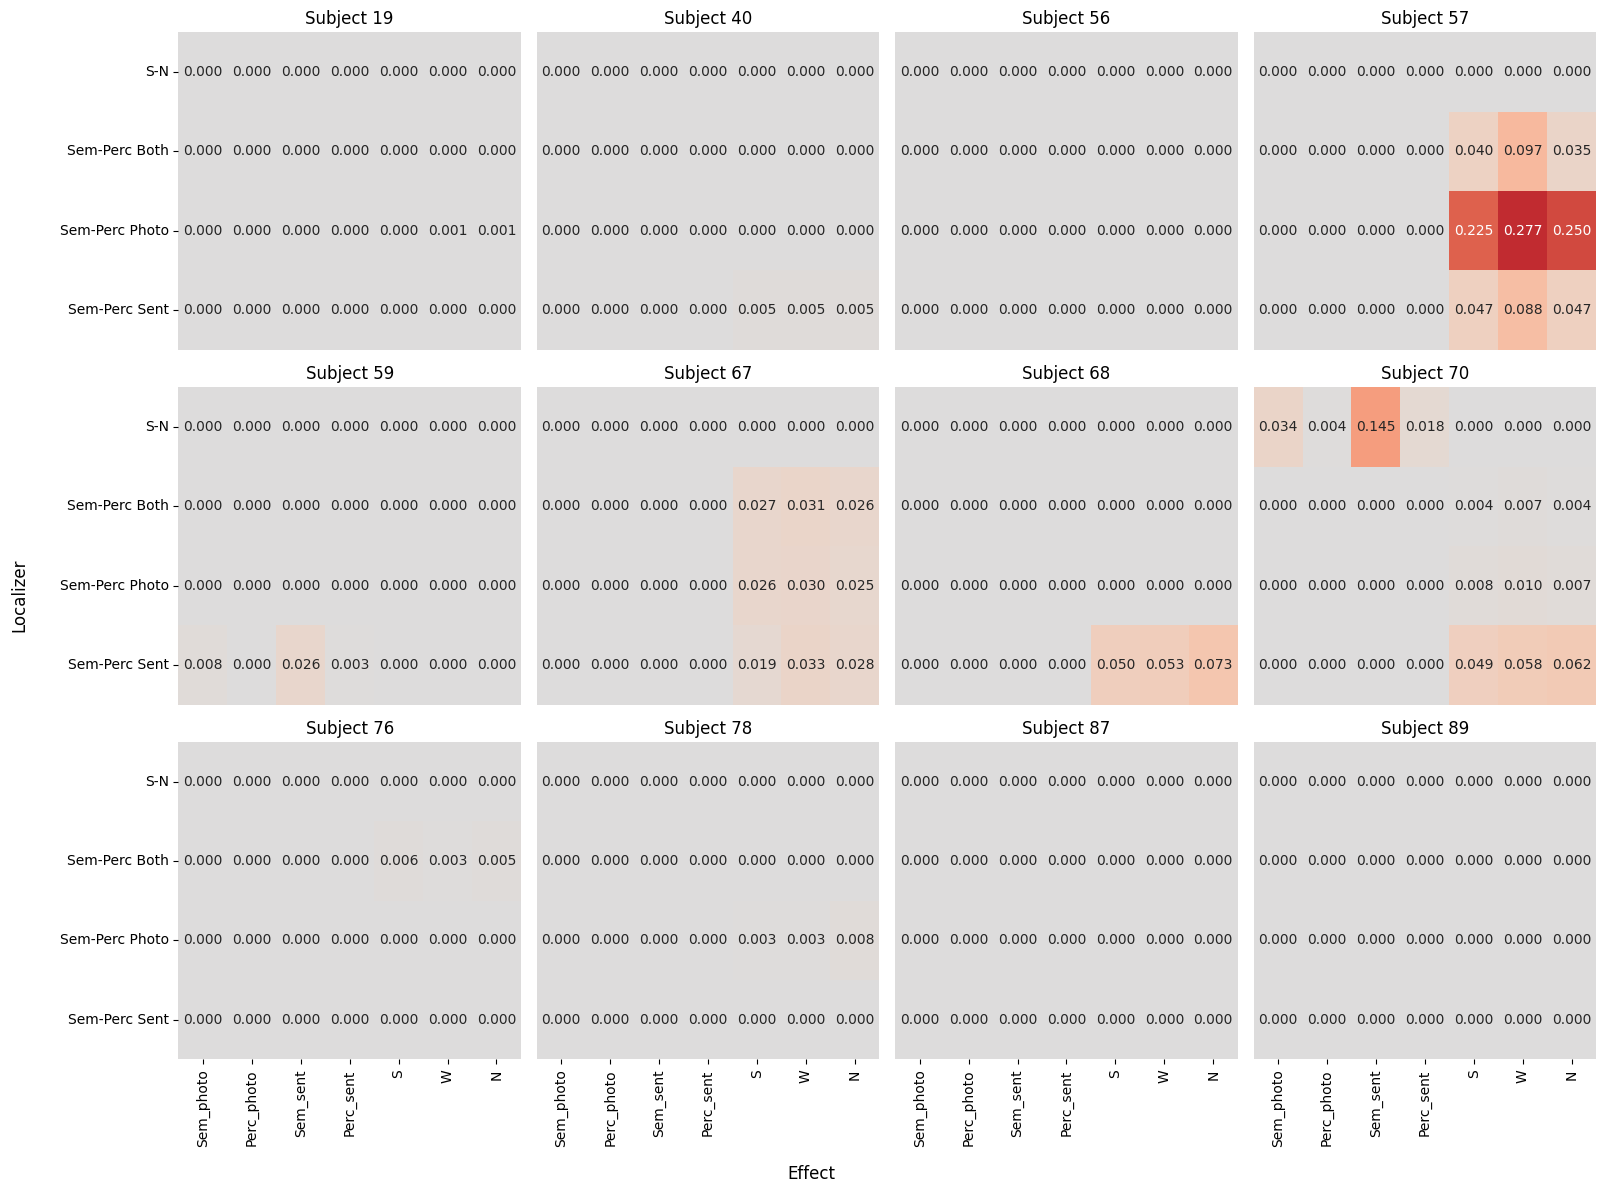

In [33]:
# 3x4 subplots for 12 subjects
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 4, figsize=(16, 12))
for i, subject in enumerate(np.unique(merged["subject"])):
    n_row, n_col = i // 4, i % 4
    ax = axs[n_row, n_col]
    # heatmap of localizer x effect, plot merged["spm_ss_effect - funROI_effect"]
    subject_data = merged[merged["subject"] == subject]
    subject_data_mean = (
        subject_data.groupby(["localizer", "effect"]).max().reset_index()
    )
    subject_data_mean = subject_data_mean.pivot(
        index="localizer",
        columns="effect",
        values="abs(spm_ss_effect - funROI_effect)",
    )
    sns.heatmap(
        subject_data_mean,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        ax=ax,
        cbar=False,
        vmin=-0.3,
        vmax=0.3,
    )
    ax.set_title(f"Subject {subject}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    if n_row != 2:  # eliminate x ticks
        ax.set_xticks([])
    if n_col != 0:  # eliminate y ticks
        ax.set_yticks([])

fig.supxlabel("Effect")
# move ylabels to the left
fig.supylabel("Localizer", x=-0.001)

plt.tight_layout()

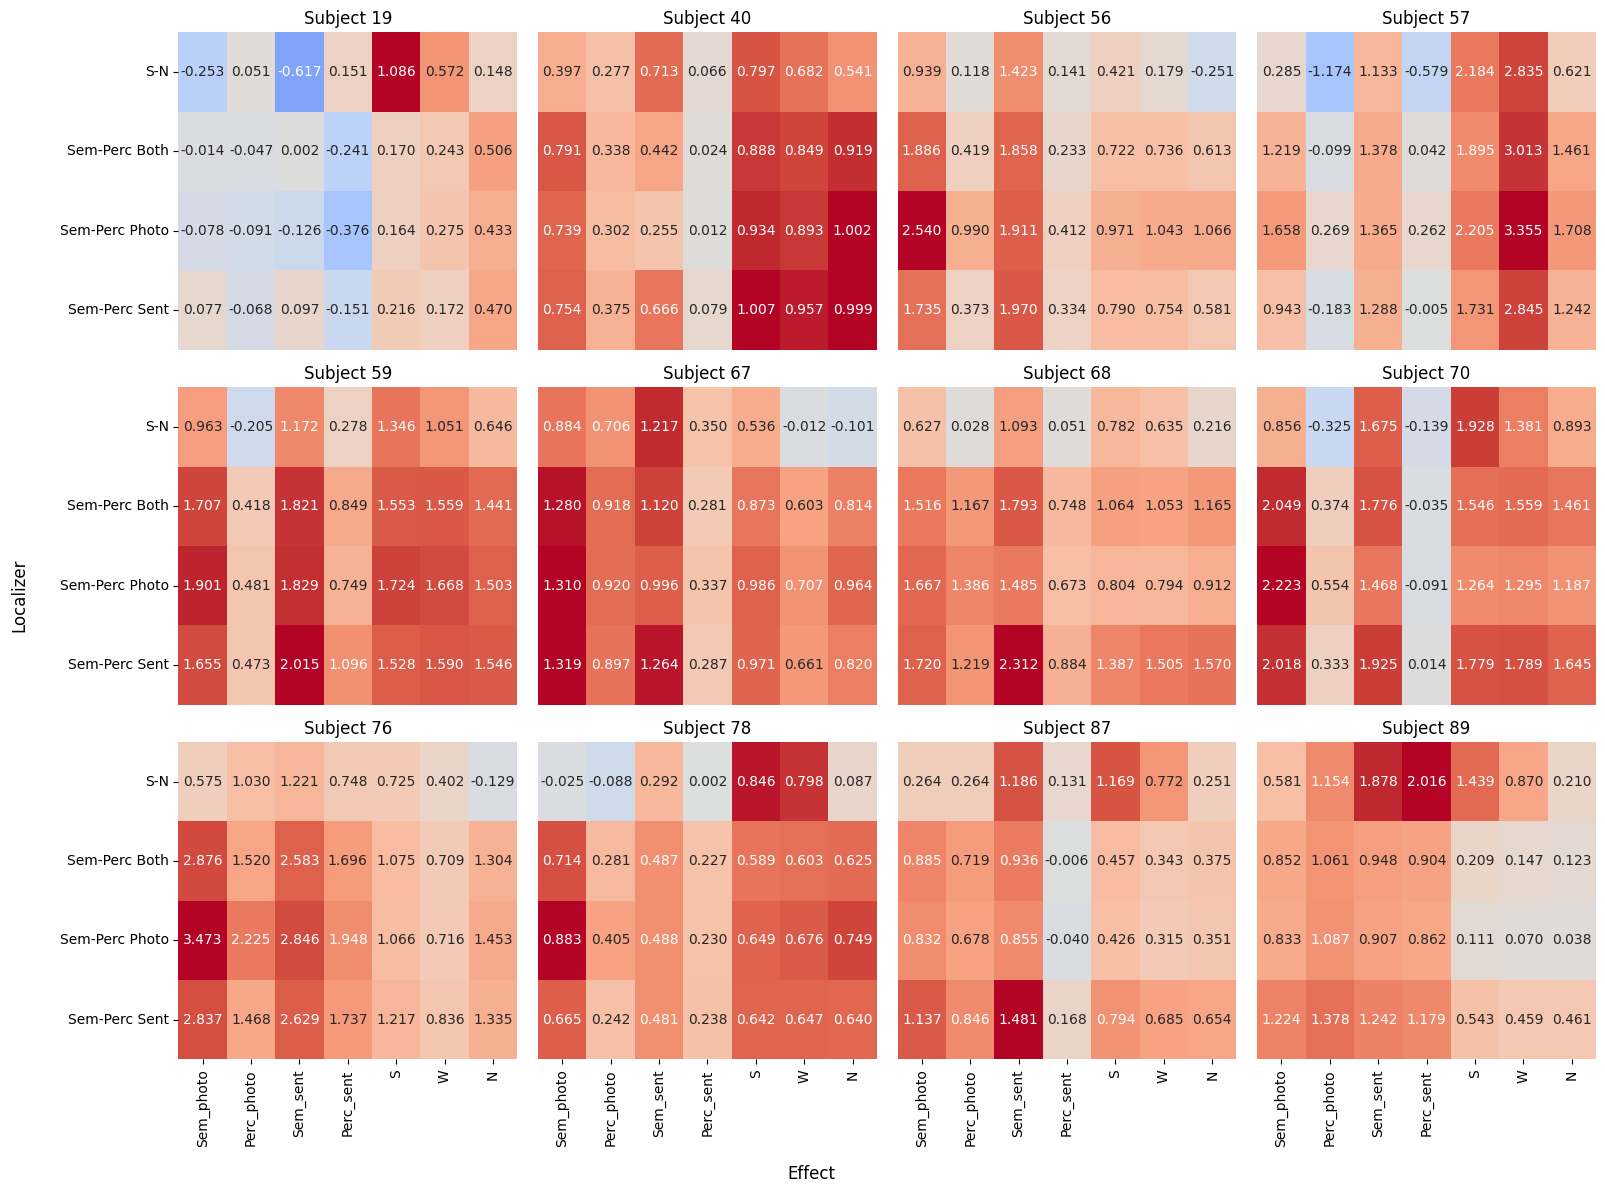

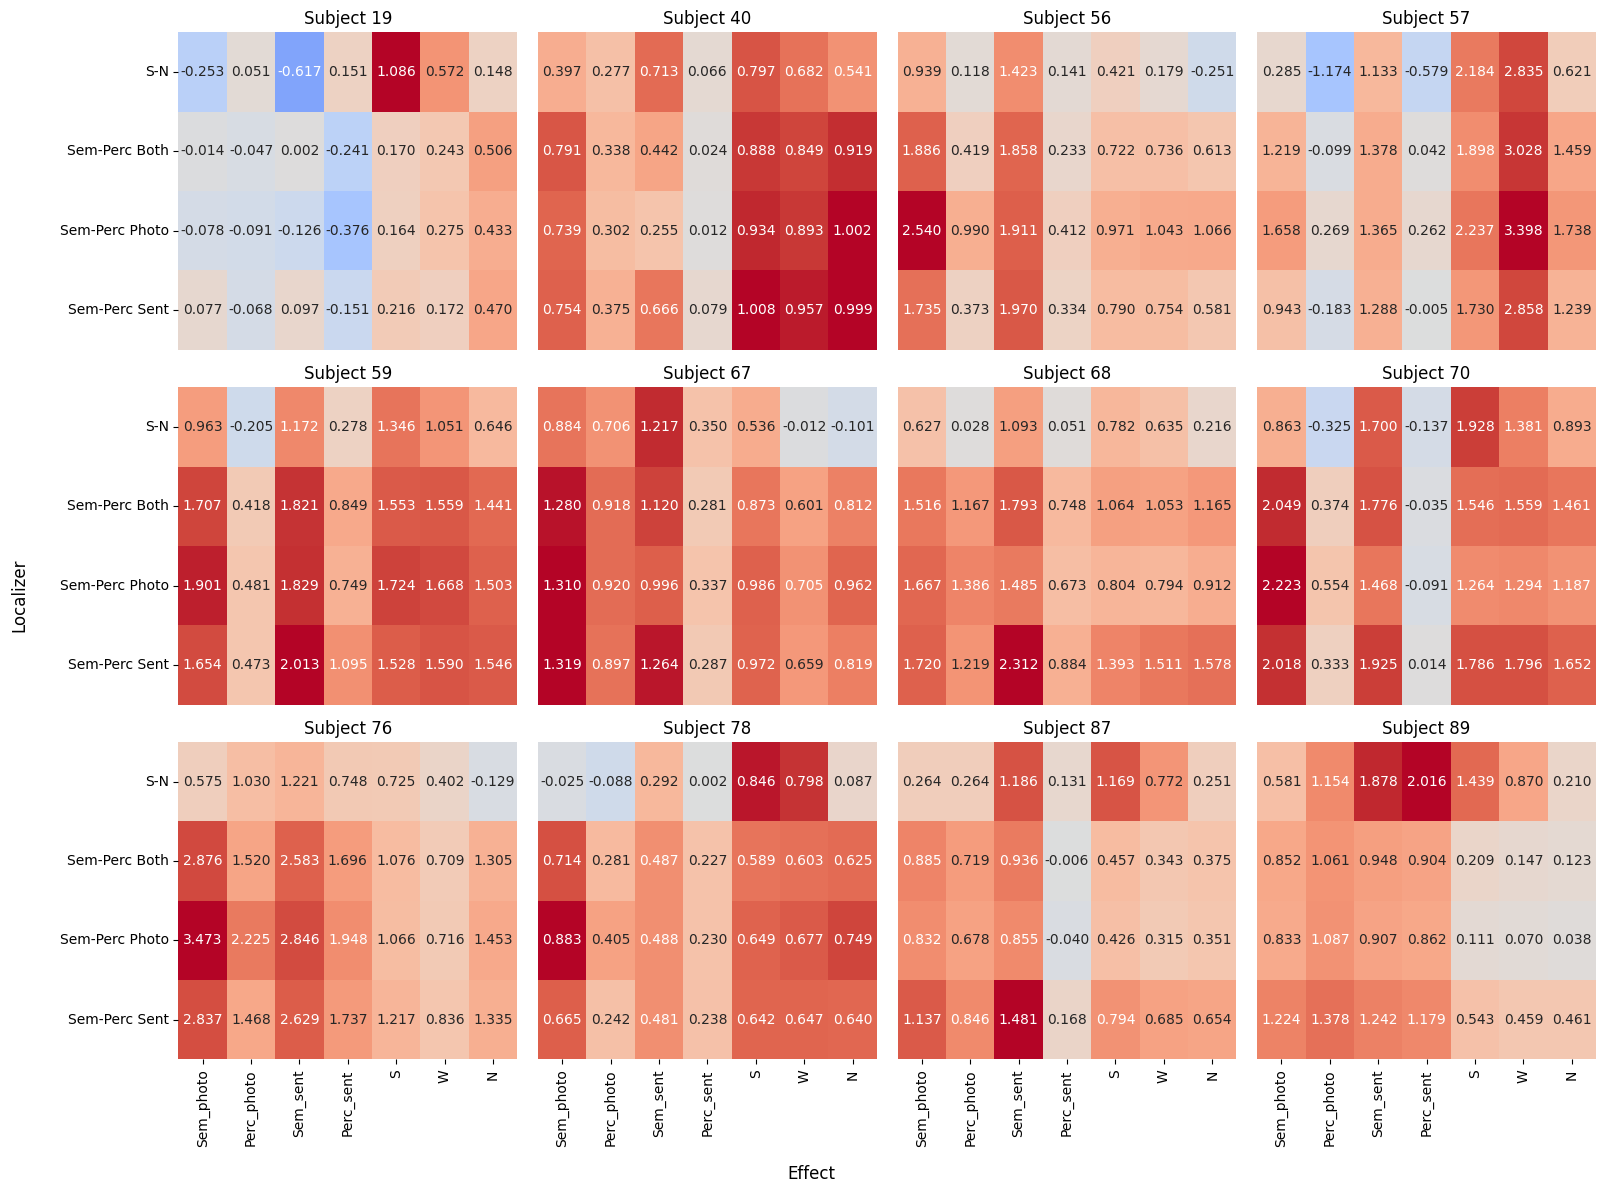

In [34]:
fig, axs = plt.subplots(3, 4, figsize=(16, 12))
for i, subject in enumerate(np.unique(merged["subject"])):
    n_row, n_col = i // 4, i % 4
    ax = axs[n_row, n_col]
    # heatmap of localizer x effect, plot merged["spm_ss_effect - funROI_effect"]
    subject_data = merged[merged["subject"] == subject]
    subject_data_mean = (
        subject_data.groupby(["localizer", "effect"]).mean().reset_index()
    )
    subject_data_mean = subject_data_mean.pivot(
        index="localizer", columns="effect", values="spm_ss_effect"
    )
    sns.heatmap(
        subject_data_mean,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        ax=ax,
        cbar=False,
    )
    ax.set_title(f"Subject {subject}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    if n_row != 2:  # eliminate x ticks
        ax.set_xticks([])
    if n_col != 0:  # eliminate y ticks
        ax.set_yticks([])

fig.supxlabel("Effect")
# move ylabels to the left
fig.supylabel("Localizer", x=-0.001)

plt.tight_layout()

fig, axs = plt.subplots(3, 4, figsize=(16, 12))
for i, subject in enumerate(np.unique(merged["subject"])):
    n_row, n_col = i // 4, i % 4
    ax = axs[n_row, n_col]
    # heatmap of localizer x effect, plot merged["spm_ss_effect - funROI_effect"]
    subject_data = merged[merged["subject"] == subject]
    subject_data_mean = (
        subject_data.groupby(["localizer", "effect"]).mean().reset_index()
    )
    subject_data_mean = subject_data_mean.pivot(
        index="localizer", columns="effect", values="funROI_effect"
    )
    sns.heatmap(
        subject_data_mean,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        ax=ax,
        cbar=False,
    )
    ax.set_title(f"Subject {subject}")
    ax.set_xlabel("")
    ax.set_ylabel("")
    if n_row != 2:  # eliminate x ticks
        ax.set_xticks([])
    if n_col != 0:  # eliminate y ticks
        ax.set_yticks([])

fig.supxlabel("Effect")
# move ylabels to the left
fig.supylabel("Localizer", x=-0.001)

plt.tight_layout()